In [158]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_last.csv")

In [159]:
data.head()

,Unnamed: 0,doc_no,sentence_no,word,tag
0,0,2800,0,İster,CONJ
1,1,2800,0,tango,NOUN
2,2,2800,0,yap,VERB
3,3,2800,0,ister,CONJ
4,4,2800,0,göbek,NOUN


In [160]:
data=data.drop("Unnamed: 0", axis=1)

In [161]:
words = list(set(data["word"].values))
n_words = len(words); n_words

517

In [162]:
tags = list(set(data["tag"].values))
n_tags = len(tags); n_tags

11

In [163]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence_no").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [164]:
getter = SentenceGetter(data)

In [165]:
sentences = getter.sentences; sentences

[[('İster', 'CONJ'),
  ('tango', 'NOUN'),
  ('yap', 'VERB'),
  ('ister', 'CONJ'),
  ('göbek', 'NOUN'),
  ('at!', 'VERB'),
  ('Dünya', 'NOUN'),
  ('Sağlık', 'NOUN'),
  ("Örgütü'nün", 'NOUN'),
  ('rakamlarına', 'NOUN'),
  ('göre', 'ADV'),
  ("2000'de", 'NUM'),
  ('66', 'NUM'),
  ('olan', 'ADJ'),
  ('ortalama', 'ADJ'),
  ('ömür', 'NOUN'),
  ("2009'da", 'NUM'),
  ("68'e", 'NUM'),
  ('yükseldi.', 'VERB'),
  ('Akıl', 'NOUN'),
  ('hastaneleri', 'NOUN'),
  ('tarih', 'NOUN'),
  ('olacak.', 'VERB'),
  ('Akciğer', 'NOUN'),
  ('tomografisi', 'NOUN'),
  ('hayat', 'NOUN'),
  ('kurtarıyor.', 'VERB')],
 [('Ama', 'CONJ'),
  ('iskeletimiz', 'NOUN'),
  ('uzun', 'ADJ'),
  ('yaşam', 'NOUN'),
  ('süresine', 'NOUN'),
  ('hazır', 'ADJ'),
  ('değil.', 'VERB'),
  ('Sağlık', 'NOUN'),
  ('Bakanı', 'NOUN'),
  ('Recep', 'NOUN'),
  ('Akdağ,', 'NOUN'),
  ('yeni', 'ADJ'),
  ('yılla', 'NOUN'),
  ('birlikte', 'ADP'),
  ('ağır', 'ADJ'),
  ('ruh', 'NOUN'),
  ('sağlığı', 'NOUN'),
  ('problemi', 'NOUN'),
  ('olan', 'ADJ'),


In [166]:
sentences[0]

[('İster', 'CONJ'),
 ('tango', 'NOUN'),
 ('yap', 'VERB'),
 ('ister', 'CONJ'),
 ('göbek', 'NOUN'),
 ('at!', 'VERB'),
 ('Dünya', 'NOUN'),
 ('Sağlık', 'NOUN'),
 ("Örgütü'nün", 'NOUN'),
 ('rakamlarına', 'NOUN'),
 ('göre', 'ADV'),
 ("2000'de", 'NUM'),
 ('66', 'NUM'),
 ('olan', 'ADJ'),
 ('ortalama', 'ADJ'),
 ('ömür', 'NOUN'),
 ("2009'da", 'NUM'),
 ("68'e", 'NUM'),
 ('yükseldi.', 'VERB'),
 ('Akıl', 'NOUN'),
 ('hastaneleri', 'NOUN'),
 ('tarih', 'NOUN'),
 ('olacak.', 'VERB'),
 ('Akciğer', 'NOUN'),
 ('tomografisi', 'NOUN'),
 ('hayat', 'NOUN'),
 ('kurtarıyor.', 'VERB')]

In [167]:
agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]

In [168]:
data.groupby("sentence_no").apply(agg_func)[0]

[('İster', 'CONJ'),
 ('tango', 'NOUN'),
 ('yap', 'VERB'),
 ('ister', 'CONJ'),
 ('göbek', 'NOUN'),
 ('at!', 'VERB'),
 ('Dünya', 'NOUN'),
 ('Sağlık', 'NOUN'),
 ("Örgütü'nün", 'NOUN'),
 ('rakamlarına', 'NOUN'),
 ('göre', 'ADV'),
 ("2000'de", 'NUM'),
 ('66', 'NUM'),
 ('olan', 'ADJ'),
 ('ortalama', 'ADJ'),
 ('ömür', 'NOUN'),
 ("2009'da", 'NUM'),
 ("68'e", 'NUM'),
 ('yükseldi.', 'VERB'),
 ('Akıl', 'NOUN'),
 ('hastaneleri', 'NOUN'),
 ('tarih', 'NOUN'),
 ('olacak.', 'VERB'),
 ('Akciğer', 'NOUN'),
 ('tomografisi', 'NOUN'),
 ('hayat', 'NOUN'),
 ('kurtarıyor.', 'VERB')]

In [169]:
max_len = 75
max_len_char = 10

In [171]:
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [172]:
print(word2idx["ömür"])
print(tag2idx["NOUN"])

108
4


In [173]:
from keras.preprocessing.sequence import pad_sequences
X_word = [[word2idx[w[0]] for w in s] for s in sentences]

In [174]:
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')

In [175]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

72


In [176]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [177]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))


In [180]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [181]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [182]:
from sklearn.model_selection import train_test_split
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.1, random_state=2018)

In [183]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

In [185]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,))
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.3))(emb_char)

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.1)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.2))(x)
out = TimeDistributed(Dense(n_tags + 1, activation="sigmoid"))(main_lstm)

model = Model([word_in, char_in], out)

In [186]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [187]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 75, 10)       0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 75)           0                                            
__________________________________________________________________________________________________
time_distributed_13 (TimeDistri (None, 75, 10, 10)   740         input_10[0][0]                   
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 75, 20)       10380       input_9[0][0]                    
____________________________________________________________________________________________

In [188]:
history = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1)

/home/merve/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 20s 1s/step - loss: 1.0465 - acc: 0.1210 - val_loss: 1.5376 - val_acc: 0.4409
Epoch 2/10
17/17 [==============================] - 2s 101ms/step - loss: 1.0443 - acc: 0.4786 - val_loss: 1.5342 - val_acc: 0.6022
Epoch 3/10
17/17 [==============================] - 2s 100ms/step - loss: 1.0418 - acc: 0.5773 - val_loss: 1.5304 - val_acc: 0.6452
Epoch 4/10
17/17 [==============================] - 2s 95ms/step - loss: 1.0395 - acc: 0.5885 - val_loss: 1.5263 - val_acc: 0.6452
Epoch 5/10
17/17 [==============================] - 2s 116ms/step - loss: 1.0363 - acc: 0.5903 - val_loss: 1.5216 - val_acc: 0.6452
Epoch 6/10
17/17 [==============================] - 2s 123ms/step - loss: 1.0330 - acc: 0.5903 - val_loss: 1.5162 - val_acc: 0.6452
Epoch 7/10
17/17 [==============================] - 2s 107ms/step - loss: 1.0292 - acc: 0.5903 - val_loss: 1.5101 - val_acc: 0.6452
Epoch 8/10
17/17 [==================

In [189]:
hist = pd.DataFrame(history.history)

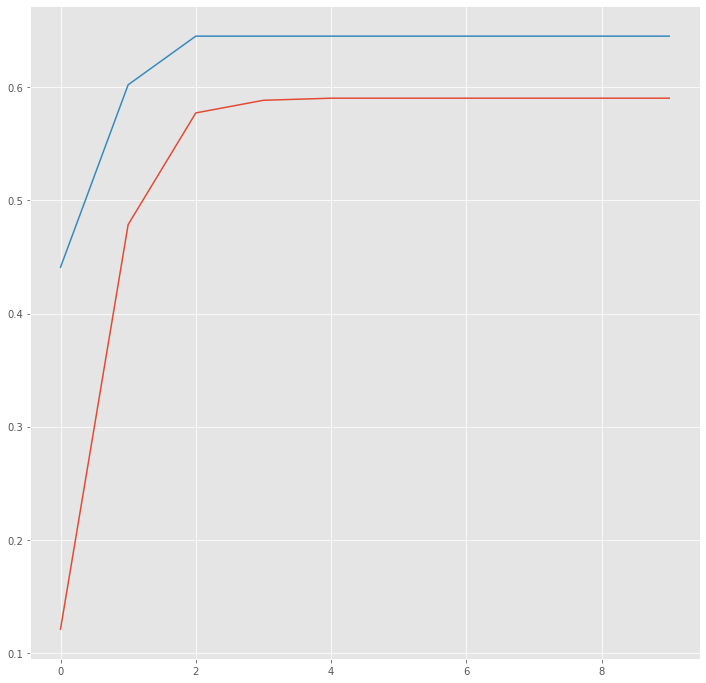

In [190]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

In [191]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])

In [192]:
i = 1
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_word_te[i], y_te[i], p):
    if w != 0:
        print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
Akciğer        : NOUN  NOUN
kanserinin     : NOUN  NOUN
teşhisinde;    : NOUN  NOUN
bilgisayarlı   : NOUN  NOUN
tomografi,     : NOUN  NOUN
manyetik       : ADJ   NOUN
rezonans       : NOUN  NOUN
görüntüleme,   : NOUN  NOUN
pozitron       : NOUN  NOUN
emisyon        : NOUN  NOUN
tomografisi,   : NOUN  NOUN
kan            : NOUN  NOUN
ve             : CONJ  NOUN
balgam         : NOUN  NOUN
testleri       : NOUN  NOUN
kullanılıyor.  : VERB  NOUN
